In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

x = np.array([1.0,0.8,0.1,0.2,0.5,0.1,0,0.2]) # even number
# x = np.array([1.0,0.8,0.1,0.2,0.5,0.1,0.2]) # odd number

xf = np.fft.fft(x)

plt.subplot(3,1,1)
plt.stem(x); plt.ylabel('x')
plt.title('Even number real signal')
# plt.title('Odd number real signal')

plt.subplot(3,1,2)
plt.stem(np.abs(xf)); plt.ylabel('abs(X)')

plt.subplot(3,1,3)
plt.stem(np.angle(xf)); plt.ylabel('angle(X)')

plt.tight_layout()

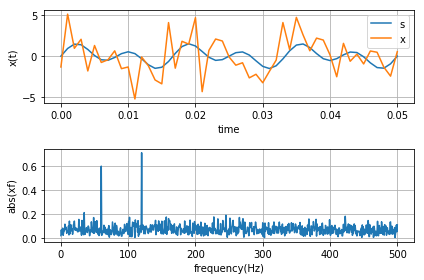

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fmax = 1000      # sampling frequency 1000 Hz
dt = 1/fmax      # sampling period
N  = 1500      # length of signal

t  = np.arange(0,N)*dt   # time = [0, dt, ..., (N-1)*dt]

s = 0.7*np.sin(2*np.pi*60*t) + np.sin(2*np.pi*120*t)

x = s+2*np.random.randn(N)   # random number Normal distn, N(0,2)... N(0,2*2)

plt.subplot(2,1,1)
plt.plot(t[0:51],s[0:51],label='s')
plt.plot(t[0:51],x[0:51],label='x')
plt.legend()
plt.xlabel('time'); plt.ylabel('x(t)'); plt.grid()

# Fourier spectrum

df = fmax/N   # df = 1/N = fmax/N
f = np.arange(0,N)*df     #   frq = [0, df, ..., (N-1)*df]

xf = np.fft.fft(x)*dt

plt.subplot(2,1,2)
plt.plot(f[0:int(N/2+1)],np.abs(xf[0:int(N/2+1)]))
#plt.plot(f,np.abs(xf))
plt.xlabel('frequency(Hz)'); plt.ylabel('abs(xf)'); plt.grid()
plt.tight_layout()

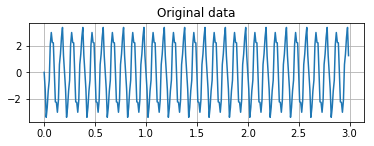

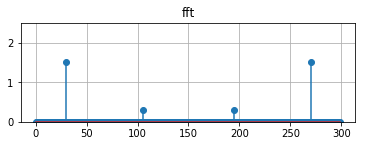

C:\Users\tony9\Anaconda3\envs\timeSeries35\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


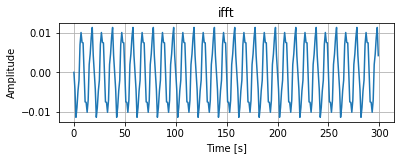

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
fs = 100 
t = np.arange(0, 3, 1 / fs)
f1 = 35 # 35Hz signal
f2 = 10 # 10Hz siganl
signal = 0.6 * np.sin(2 * np.pi * f1 * t) +3 * np.cos(2 * np.pi * f2 * t + np.pi/2) #  create signal by f1, f2
 
fft = np.fft.fft(signal) / len(signal) # must divide return value by signal size, need normalization
                                       # make graph suit in scale values
fft_magnitude = abs(fft)
plt.subplot(2,1,1)
plt.plot(t,signal)
plt.title('Original data')
plt.grid()
plt.show()

plt.subplot(2,1,1)
plt.stem(fft_magnitude)
plt.ylim(0,2.5)
plt.title('fft')
plt.grid()                                                                                 
 
plt.show()

freq = fft
filtered_sig = np.fft.ifft(freq)

plt.subplot(2,1,1)
plt.plot(filtered_sig, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title("ifft")
plt.grid()
plt.show()

In [8]:
np.corrcoef(signal.real, filtered_sig.real)

array([[1., 1.],
       [1., 1.]])

In [24]:
print([i for i in fft_magnitude if i > 1])
print(fft)

[1.5000000000000002, 1.5000000000000004]
[ 3.44808381e-16+0.00000000e+00j -2.72074057e-17-4.07081776e-16j
  7.73895078e-16+2.02304148e-16j  2.26704476e-17-1.53950926e-16j
  8.65719805e-17+8.32994325e-17j  2.31583893e-16+4.64760552e-16j
  1.24180553e-16-3.27934207e-16j  7.13269772e-16-1.98955656e-17j
 -4.82090464e-16+4.45501004e-16j  7.73799533e-16+4.18184006e-16j
  4.54816169e-16+6.54638909e-16j -1.51211109e-16+8.64949187e-17j
 -3.85811485e-16-4.62328228e-17j  4.48097184e-16-3.85806646e-16j
 -2.94617455e-16+5.05065300e-16j  4.11695789e-16+2.36847579e-17j
  8.66903297e-16+2.61158099e-16j -5.95635432e-16-2.33777160e-17j
  1.29063744e-15+1.23864292e-15j -7.83974600e-16+4.12528298e-16j
  2.59449447e-17-3.51644882e-16j -4.21467956e-16+9.93565144e-16j
 -2.83874942e-16-2.77260355e-16j -5.07204280e-16+2.15986872e-16j
  4.02105589e-16-4.24957604e-16j  4.39282479e-17+2.30574302e-15j
 -2.07710404e-15-7.61164762e-16j -1.14305023e-15-5.50808350e-16j
  7.74920941e-16-1.70698136e-15j -1.24968746e-15-

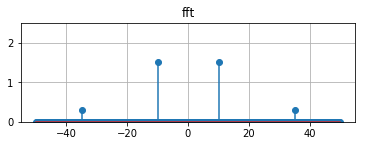

In [26]:
length = len(signal)
f= np.linspace(-(fs/2), fs/2, length)
plt.subplot(2,1,1)
plt.stem(f, np.fft.fftshift(fft_magnitude))
plt.title("fft")
plt.ylim(0,2.5)
plt.grid()

plt.show()

In [10]:
# Make discrete fourier transform easy way
import numpy as np
def DFT_slow(x):
    #Compute the discrete JFourier Transform of the 1D array x
    x = np.array(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    
    return np.dot(M, x)

In [11]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

%timeit DFT_slow(x)
%timeit np.fft.fft(x)

10 loops, best of 3: 76.5 ms per loop
The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 15.1 µs per loop


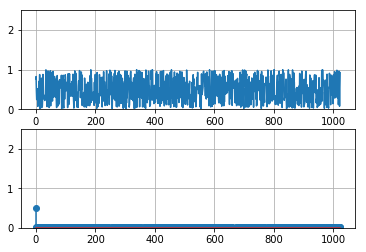

In [12]:
import matplotlib.pyplot as plt
plt.subplot(2,1,2)
plt.stem(abs(DFT_slow(x)/len(x)))
plt.ylim(0,2.5)
plt.grid()

plt.subplot(2,1,1)
plt.plot(x)
plt.ylim(0,2.5)
plt.grid()
 
plt.show()

In [13]:
import numpy as np
def FFT(x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(x)
    else:
        X_even = FFT(x[:: 2])
        X_odd = FFT(x[1:: 2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])

In [14]:
x = np.random.random(1024)
np.allclose(FFT(x), np.fft.fft(x))

True

In [15]:
%timeit DFT_slow(x)
%timeit FFT(x)
%timeit np.fft.fft(x)

10 loops, best of 3: 75.6 ms per loop
100 loops, best of 3: 2.66 ms per loop
The slowest run took 14.05 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.4 µs per loop


In [16]:
import numpy as np
def FFT_vectorized(x):
    """A vectorized, non-recursize version of the Cooly-Turkey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be power of 2")
        
    N_min = min(N, 32)
        
    n = np.arange(N_min)
    k = n[:,None]
    M = np.exp(-2j*np.pi*n*k/N_min)
    X=np.dot(M, x.reshape((N_min, -1)))

    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        factor = np.exp(-1j*np.pi*np.arange(X.shape[0])/X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd, X_even - factor * X_odd])

    return X.ravel()

In [17]:
x = np.random.random(1024)
np.allclose(FFT_vectorized(x), np.fft.fft(x))

True

In [18]:
x = np.random.random(1024 * 16)
%timeit FFT(x)
%timeit FFT_vectorized(x)
%timeit np.fft.fft(x)

10 loops, best of 3: 46.7 ms per loop
100 loops, best of 3: 2.31 ms per loop
1000 loops, best of 3: 242 µs per loop


[np.allclose]


C:\Users\tony9\Anaconda3\envs\timeSeries35\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


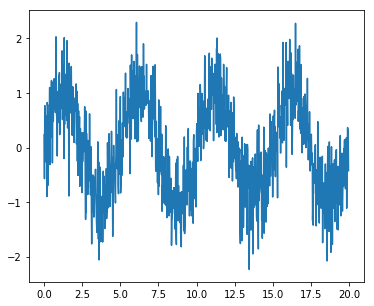

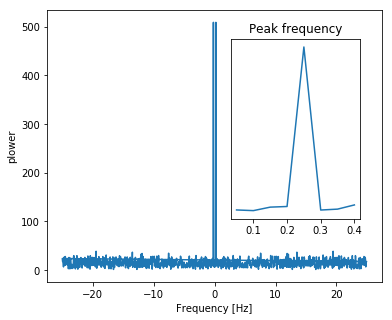

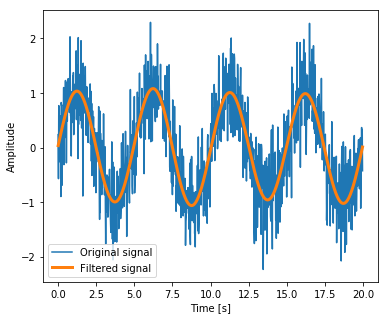

In [19]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

#신호를 생성합니다.
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec) + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

#FFT의 Power를 계산합니다.
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)
    # print("sig: ",sig)
    # print("sig_fft: ",sig_fft)
    # print("power: ",power)
    # print("sample_freq: ", sample_freq)
    # print("sig_fft_shape: ", sig_fft.shape)
# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

    # print("pos_mask: ",pos_mask)
    # print("freqs: ",freqs)
    # print("peak_freq: ",peak_freq)

# Check that it does indeed correspond to the frequency that we generate
# the signal with
print("[np.allclose]")
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
# scipy.signal.find_peaks_cwt can also be used for more advanced  peak detection

#모든 high frequencies를 제거합니다.
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

    # print("high_freq_fft: ",high_freq_fft)
    # print("filterd_sig: ",filtered_sig)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

plt.show()

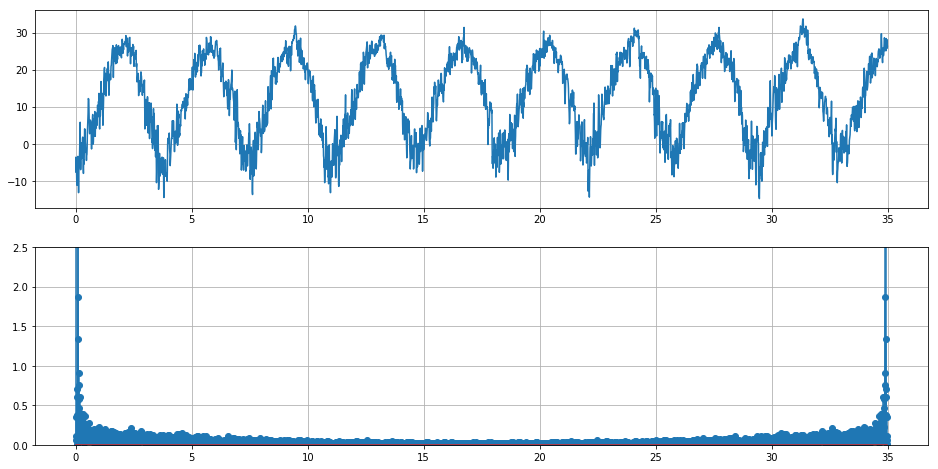

In [16]:
import pandas as pd
import numpy as np
path="dataset/weather_data.csv"
# with open(path, 'rb') as f:
#     buf  = f.read()
#     print(buf)
data = pd.read_csv(path, encoding='euc-kr')
data['일시'] = data['일시'].map(pd.to_datetime)

data = np.array(data['평균기온']).reshape(-1)
data=data[:3500]

fs = 100
t = np.arange(0, 35, 1 / fs)

fft = np.fft.fft(data)/len(data)
plt.figure(figsize=(16,8))
fft_magnitude = abs(fft)
plt.subplot(2,1,1)
plt.plot(t,data)
plt.grid()
 
plt.subplot(2,1,2)
plt.stem(t, fft_magnitude)
plt.ylim(0,2.5)
plt.grid()                                                                                 
 
plt.show()

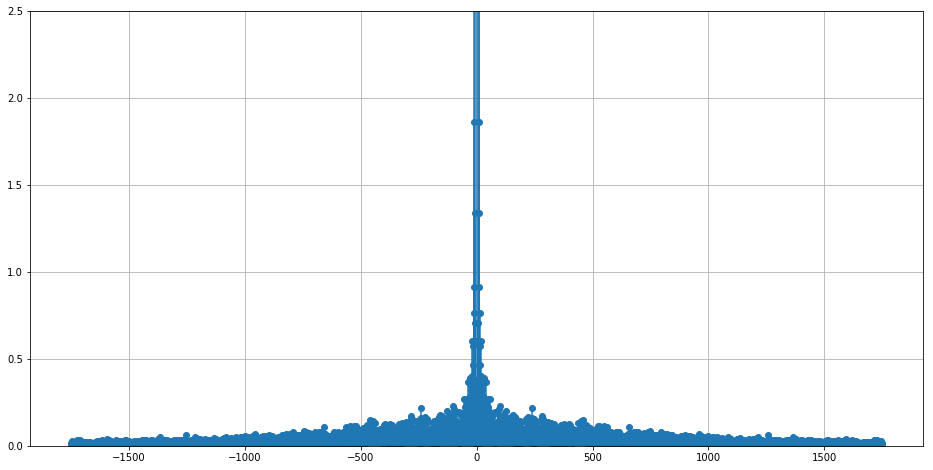

In [17]:
length = len(data)
f= np.linspace(-(length/2), length/2, length)

plt.figure(figsize=(16,8))
plt.stem(f, np.fft.fftshift(fft_magnitude))
plt.ylim(0,2.5)
plt.grid()

plt.show()

(3756,)


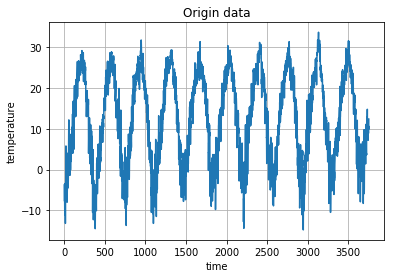

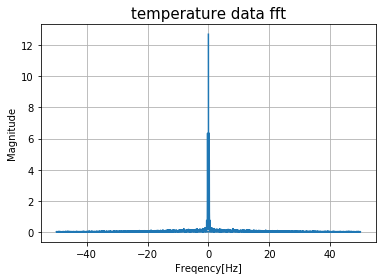

C:\Users\tony9\Anaconda3\envs\timeSeries35\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


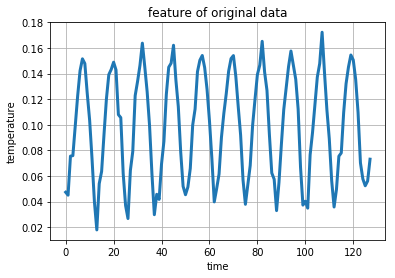

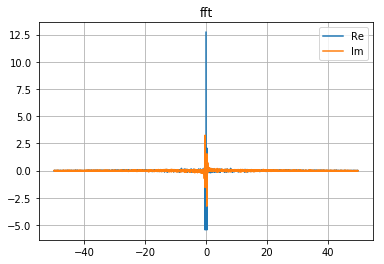

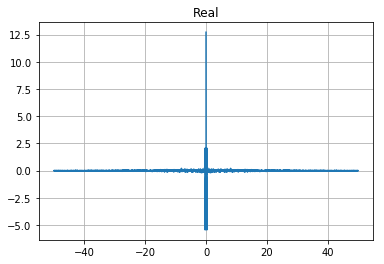

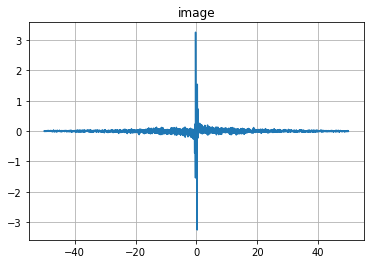

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path="dataset/weather_data.csv"
# with open(path, 'rb') as f:
#     buf  = f.read()
#     print(buf)
data = pd.read_csv(path, encoding='euc-kr')
data['일시'] = data['일시'].map(pd.to_datetime)

data = np.array(data['평균기온']).reshape(-1)
print(data.shape)

fft = np.fft.fft(data)/len(data)
# sample_freq = np.fft.fftfreq(fft_magnitude.shape[-1])
sample_freq = np.fft.fftfreq(fft.size, d=0.01)

plt.title("Origin data")
plt.xlabel("time")
plt.ylabel("temperature")
fft_magnitude = abs(fft)
plt.plot(data)
plt.grid()
plt.show()

length = len(data)
f= np.linspace(-(length/2), length/2, length)
# plt.stem(f, np.fft.fftshift(fft_magnitude))

plt.plot(sample_freq, fft_magnitude)
plt.title("temperature data fft",fontsize=15)
plt.xlabel("Freqency[Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()

freqs = fft[:128]
filtered_sig = np.fft.ifft(freqs)
plt.xlabel("time")
plt.ylabel("temperature")
plt.title("feature of original data")
plt.plot(filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel
plt.grid()
 
plt.show()

plt.plot(sample_freq, fft.real, label='Re')
plt.plot(sample_freq, fft.imag, label='Im')
plt.title("fft")
plt.grid()
plt.legend()
plt.show()

# sample_freq = np.fft.fftfreq(fft.size, d=0.01)

plt.plot(sample_freq, fft.real)
plt.title("Real")
plt.grid()
plt.show()
plt.plot(sample_freq, fft.imag)
plt.title("image")
plt.grid()
plt.show()

C:\Users\tony9\Anaconda3\envs\timeSeries35\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


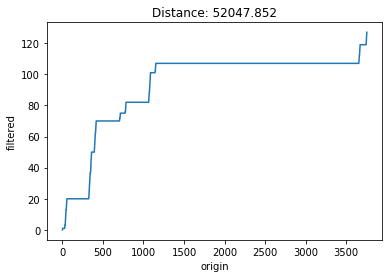

In [19]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

distance, path = fastdtw(data, filtered_sig, dist=euclidean)

origin_data = [p[0] for p in path]
filtered_data = [p[1] for p in path]

fig, ax = plt.subplots()
ax.plot(origin_data, filtered_data)
ax.set_title("Distance: {}".format(round(distance, 3)))
# plt.plot(arraysA_path, arraysB_path)
ax.set_xlabel("origin")
ax.set_ylabel("filtered")
plt.show()